In [1]:
# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

In [2]:
# 예제 2: 실제 데이터셋
# ============================================

# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# 폰트 설정
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False


In [3]:


# 1. 데이터셋 로드 및 탐색
print(" 1단계: 데이터셋 로드 및 탐색")
print("-" * 40)

# 유방암 데이터셋 로드 (이진 분류)
data = load_breast_cancer()
X, y = data.data, data.target

print(f"데이터 형태: {X.shape}")
print(f"특성 개수: {X.shape[1]}")
print(f"샘플 개수: {X.shape[0]}")
print(f"클래스 분포:")
print(f"  - 악성 (0): {np.sum(y == 0)}개")
print(f"  - 양성 (1): {np.sum(y == 1)}개")
print()

 1단계: 데이터셋 로드 및 탐색
----------------------------------------
데이터 형태: (569, 30)
특성 개수: 30
샘플 개수: 569
클래스 분포:
  - 악성 (0): 212개
  - 양성 (1): 357개



In [4]:

# 2. 데이터 전처리 및 분할
print(" 2단계: 데이터 전처리 및 분할")
print("-" * 40)

# 훈련/테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"훈련 세트: {X_train_scaled.shape}")
print(f"테스트 세트: {X_test_scaled.shape}")
print()


 2단계: 데이터 전처리 및 분할
----------------------------------------
훈련 세트: (398, 30)
테스트 세트: (171, 30)



In [5]:

# 3. 모델 학습 및 예측
print(" 3단계: 모델 학습 및 예측")
print("-" * 40)

# 로지스틱 회귀 모델
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# 랜덤 포레스트 모델
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 예측 확률 계산
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# 예측 레이블 (임계값 0.5)
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

print(" 모델 학습 완료!")
print()

 3단계: 모델 학습 및 예측
----------------------------------------
 모델 학습 완료!



In [6]:



# 4. ROC 곡선 및 AUC 계산
print(" 4단계: ROC 곡선 및 AUC 계산")
print("-" * 40)

# ROC 곡선 데이터 계산
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

# AUC 계산
auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)

print(f"로지스틱 회귀 AUC: {auc_lr:.4f}")
print(f"랜덤 포레스트 AUC: {auc_rf:.4f}")
print()

 4단계: ROC 곡선 및 AUC 계산
----------------------------------------
로지스틱 회귀 AUC: 0.9981
랜덤 포레스트 AUC: 0.9913



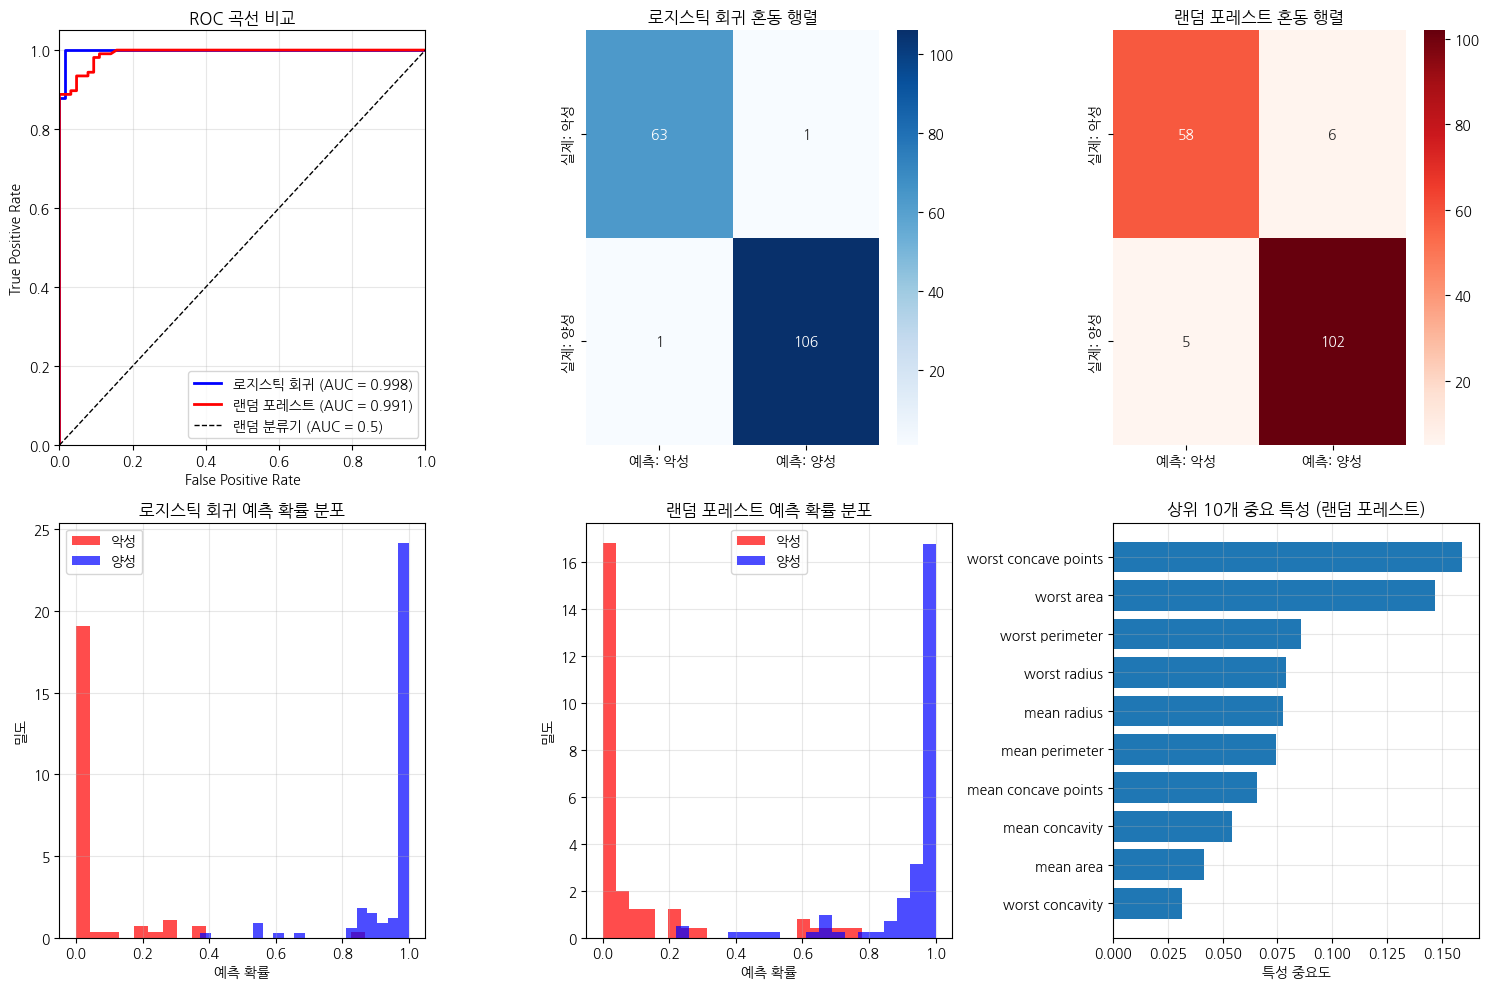

In [7]:


# 5. 시각화
plt.figure(figsize=(15, 10))

# ROC 곡선 비교
plt.subplot(2, 3, 1)
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2,
         label=f'로지스틱 회귀 (AUC = {auc_lr:.3f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2,
         label=f'랜덤 포레스트 (AUC = {auc_rf:.3f})')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--',
         label='랜덤 분류기 (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC 곡선 비교')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# 로지스틱 회귀 혼동 행렬
plt.subplot(2, 3, 2)
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['예측: 악성', '예측: 양성'],
            yticklabels=['실제: 악성', '실제: 양성'])
plt.title('로지스틱 회귀 혼동 행렬')

# 랜덤 포레스트 혼동 행렬
plt.subplot(2, 3, 3)
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds',
            xticklabels=['예측: 악성', '예측: 양성'],
            yticklabels=['실제: 악성', '실제: 양성'])
plt.title('랜덤 포레스트 혼동 행렬')

# 예측 확률 분포 (로지스틱 회귀)
plt.subplot(2, 3, 4)
plt.hist(y_pred_proba_lr[y_test == 0], bins=20, alpha=0.7,
         label='악성', color='red', density=True)
plt.hist(y_pred_proba_lr[y_test == 1], bins=20, alpha=0.7,
         label='양성', color='blue', density=True)
plt.xlabel('예측 확률')
plt.ylabel('밀도')
plt.title('로지스틱 회귀 예측 확률 분포')
plt.legend()
plt.grid(True, alpha=0.3)

# 예측 확률 분포 (랜덤 포레스트)
plt.subplot(2, 3, 5)
plt.hist(y_pred_proba_rf[y_test == 0], bins=20, alpha=0.7,
         label='악성', color='red', density=True)
plt.hist(y_pred_proba_rf[y_test == 1], bins=20, alpha=0.7,
         label='양성', color='blue', density=True)
plt.xlabel('예측 확률')
plt.ylabel('밀도')
plt.title('랜덤 포레스트 예측 확률 분포')
plt.legend()
plt.grid(True, alpha=0.3)

# 특성 중요도 (랜덤 포레스트)
plt.subplot(2, 3, 6)
feature_importance = rf_model.feature_importances_
top_features = np.argsort(feature_importance)[-10:]  # 상위 10개 특성
plt.barh(range(len(top_features)), feature_importance[top_features])
plt.yticks(range(len(top_features)), [data.feature_names[i] for i in top_features])
plt.xlabel('특성 중요도')
plt.title('상위 10개 중요 특성 (랜덤 포레스트)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [8]:

# 6. 분류 보고서
print(" 분류 보고서")
print("-" * 40)
print("로지스틱 회귀:")
print(classification_report(y_test, y_pred_lr,
                          target_names=['악성', '양성']))

print("\n랜덤 포레스트:")
print(classification_report(y_test, y_pred_rf,
                          target_names=['악성', '양성']))

# 7. 실무에서의 해석
print("\n" + "=" * 60)
print("실무에서의 ROC/AUC 해석")
print("=" * 60)
print(" 의료 진단에서의 고려사항:")
print("• 민감도(TPR)가 높으면 → 실제 환자를 놓치지 않음")
print("• 특이도(1-FPR)가 높으면 → 건강한 사람을 환자로 오진하지 않음")
print("• 의료 분야에서는 일반적으로 민감도를 더 중시")
print()
print(" 임계값 선택 전략:")
print("• 보수적 진단: 낮은 임계값 → 민감도 ↑, 특이도 ↓")
print("• 신중한 진단: 높은 임계값 → 민감도 ↓, 특이도 ↑")
print("• 비용 고려: 거짓 양성 vs 거짓 음성의 비용 비교")
print()
print(" 모델 비교:")
print(f"• 로지스틱 회귀 AUC: {auc_lr:.4f}")
print(f"• 랜덤 포레스트 AUC: {auc_rf:.4f}")
if auc_rf > auc_lr:
    print("• 랜덤 포레스트가 더 나은 성능을 보임")
else:
    print("• 로지스틱 회귀가 더 나은 성능을 보임")

# 8. 임계값별 성능 분석 (추가)
print("\n" + "=" * 60)
print("임계값별 성능 분석 (랜덤 포레스트)")
print("=" * 60)

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
print("임계값 | 민감도 | 특이도 | 정확도 | F1-점수")
print("-" * 50)

from sklearn.metrics import f1_score

for threshold in thresholds:
    y_pred_thresh = (y_pred_proba_rf >= threshold).astype(int)

    # Confusion matrix 계산
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresh).ravel()

    # 성능 지표 계산
    sensitivity = tp / (tp + fn)  # 민감도
    specificity = tn / (tn + fp)  # 특이도
    accuracy = (tp + tn) / (tp + tn + fp + fn)  # 정확도
    f1 = f1_score(y_test, y_pred_thresh)  # F1 점수

    print(f"{threshold:7.1f} | {sensitivity:7.3f} | {specificity:7.3f} | {accuracy:7.3f} | {f1:8.3f}")

print("\n 임계값 선택 가이드:")
print("• 민감도 중시: 낮은 임계값 (0.3-0.4)")
print("• 균형적 성능: 중간 임계값 (0.5)")
print("• 특이도 중시: 높은 임계값 (0.6-0.8)")
print("• 의료 진단: 민감도를 우선시하여 낮은 임계값 권장")

 분류 보고서
----------------------------------------
로지스틱 회귀:
              precision    recall  f1-score   support

          악성       0.98      0.98      0.98        64
          양성       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171


랜덤 포레스트:
              precision    recall  f1-score   support

          악성       0.92      0.91      0.91        64
          양성       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171


실무에서의 ROC/AUC 해석
 의료 진단에서의 고려사항:
• 민감도(TPR)가 높으면 → 실제 환자를 놓치지 않음
• 특이도(1-FPR)가 높으면 → 건강한 사람을 환자로 오진하지 않음
• 의료 분야에서는 일반적으로 민감도를 더 중시

 임계값 선택 전략:
• 보수적 진단: 낮은 임계값 → 민감도 ↑, 특이도 ↓
• 신중한 진단: 높은 임계값 → 민감도 ↓, 특이도 ↑
• 비용 고려: 거짓 양성 vs 거짓 음성의 비용 비교

 모델 비교:
• 로지스틱 회귀 AUC: 0.9981
• 랜덤 포